# Install Dependencies and Setup

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, accuracy_score

# Downloading and converting the data into Dataframe

In [3]:
stocks = ["AAPL"]

In [4]:
df = yf.download(stocks, start="2013-01-01")

[*********************100%***********************]  1 of 1 completed


# Exploring the Data

In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,19.779285,19.821428,19.343929,19.608213,16.813860,560518000
2013-01-03,19.567142,19.631071,19.321428,19.360714,16.601633,352965200
2013-01-04,19.177500,19.236786,18.779642,18.821428,16.139200,594333600
2013-01-07,18.642857,18.903570,18.400000,18.710714,16.044266,484156400
2013-01-08,18.900356,18.996071,18.616072,18.761070,16.087437,458707200


In [6]:
df.shape

(2648, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2648 entries, 2013-01-02 to 2023-07-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2648 non-null   float64
 1   High       2648 non-null   float64
 2   Low        2648 non-null   float64
 3   Close      2648 non-null   float64
 4   Adj Close  2648 non-null   float64
 5   Volume     2648 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 144.8 KB


In [8]:
print(df.dtypes)

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


# Data Cleaning

In [9]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
df = df.drop_duplicates()

In [11]:
df['Open'] = pd.to_numeric(df['Open'])
df['High'] = pd.to_numeric(df['High'])
df['Low'] = pd.to_numeric(df['Low'])
df['Close'] = pd.to_numeric(df['Close'])
df['Adj Close'] = pd.to_numeric(df['Adj Close'])
df['Volume'] = pd.to_numeric(df['Volume'])

In [12]:
df.head(20)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,19.779285,19.821428,19.343929,19.608213,16.813860,560518000
2013-01-03,19.567142,19.631071,19.321428,19.360714,16.601633,352965200
2013-01-04,19.177500,19.236786,18.779642,18.821428,16.139200,594333600
2013-01-07,18.642857,18.903570,18.400000,18.710714,16.044266,484156400
2013-01-08,18.900356,18.996071,18.616072,18.761070,16.087437,458707200
2013-01-09,18.660713,18.750357,18.428213,18.467857,15.836013,407604400
2013-01-10,18.876785,18.882856,18.411428,18.696787,16.032320,601146000
2013-01-11,18.607143,18.761429,18.536428,18.582144,15.934019,350506800
2013-01-14,17.952856,18.125000,17.803928,17.919643,15.365925,734207600


# Exploratory Data Analysis (EDA)

### 1. Summary Statistics

In [13]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2648.000000,2648.000000,2648.000000,2648.000000,2648.000000,2.648000e+03
mean,67.263020,68.017531,66.553014,67.318602,65.449591,1.659967e+08
std,52.242043,52.895452,51.642166,52.305204,52.815373,1.242660e+08
min,13.856071,14.271429,13.753571,13.947500,12.029556,3.145820e+07
25%,27.275000,27.561250,27.051875,27.310625,25.039960,8.771310e+07
50%,43.047499,43.377499,42.626249,43.056250,41.087305,1.261856e+08
75%,120.370001,122.007498,118.929998,120.619997,118.903601,1.999603e+08
max,193.779999,194.479996,191.759995,193.970001,193.970001,1.460852e+09


### 2. Stock Closing Price Over Time

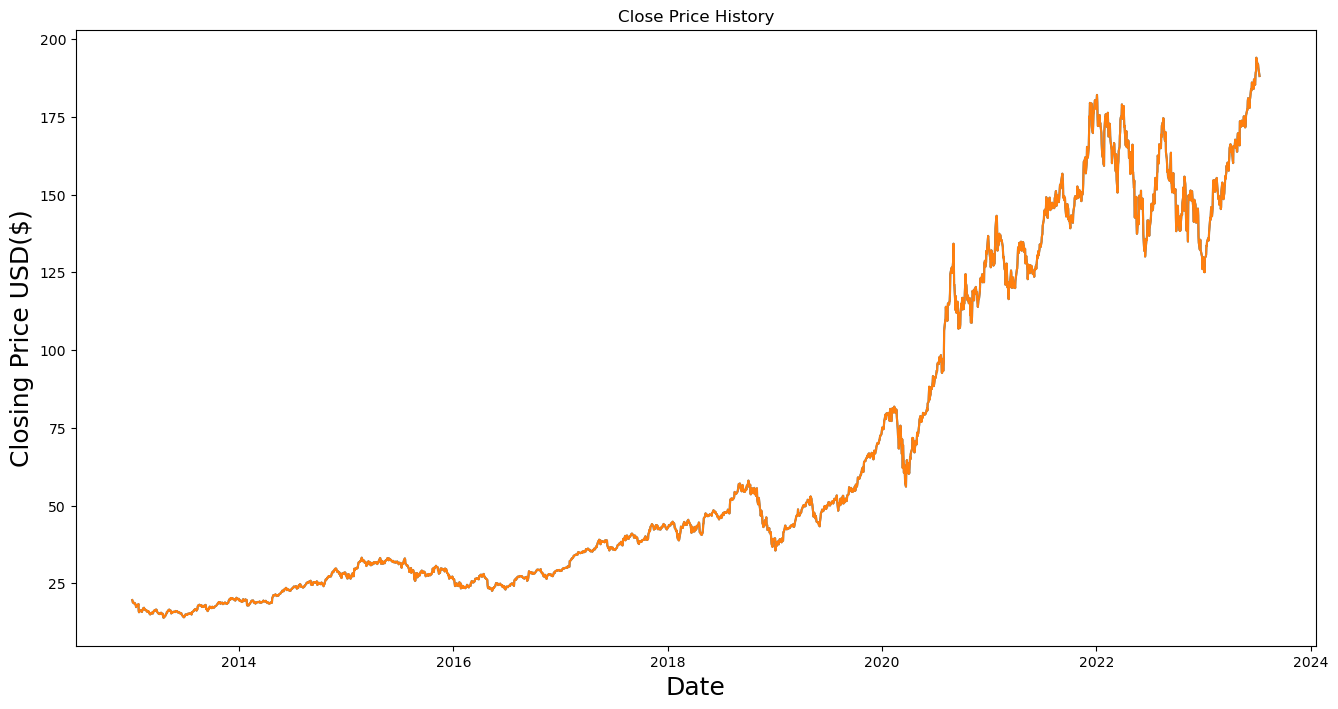

In [14]:
plt.figure(figsize=(16,8))
plt.plot(df.index, df['Close'])
plt.xlabel('Date',fontsize=18)
plt.plot(df['Close'])
plt.ylabel('Closing Price USD($)',fontsize=18)
plt.title('Close Price History')
plt.show()

### 3. Distribution of Closing Prices

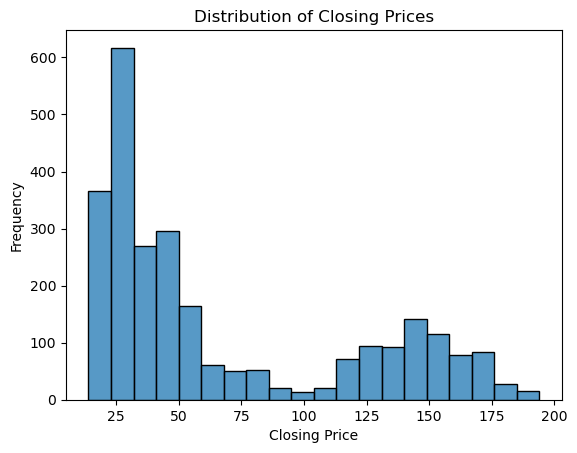

In [15]:
sns.histplot(df['Close'], bins=20)
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.title('Distribution of Closing Prices')
plt.show()

### 4. Box Plot of Closing Prices

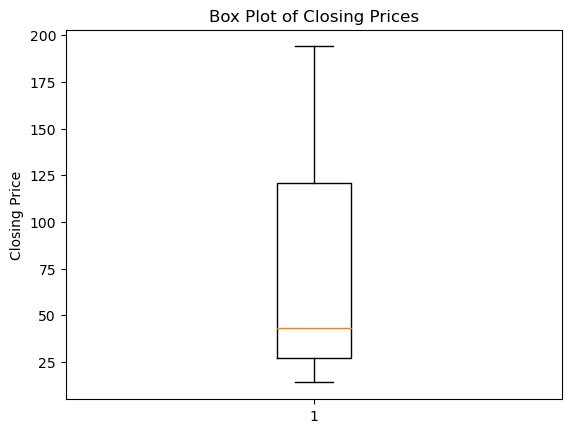

In [16]:
plt.boxplot(df['Close'])
plt.ylabel('Closing Price')
plt.title('Box Plot of Closing Prices')
plt.show()

### 5. Correlation Matrix

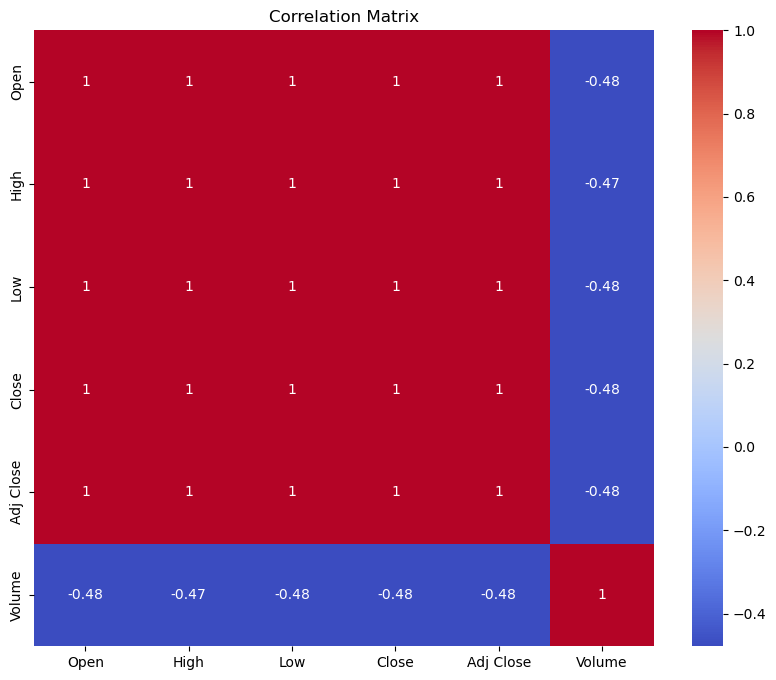

In [17]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### 6. Time Series Decomposition

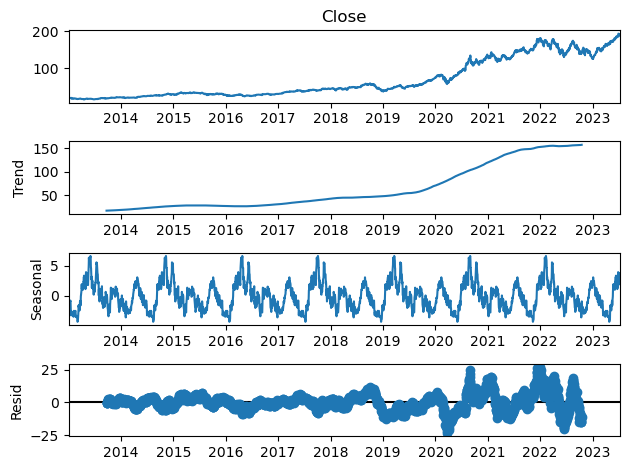

In [18]:
decomposition = seasonal_decompose(df['Close'], model='additive', period=365)
decomposition.plot()
plt.show()

### 7. Closing Price vs Volume

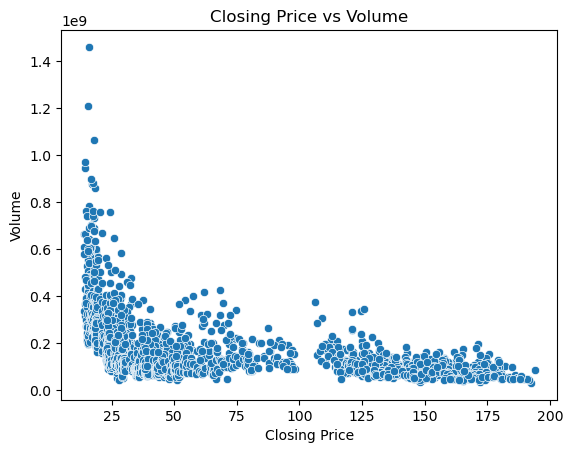

In [19]:
sns.scatterplot(data=df, x='Close', y='Volume')
plt.xlabel('Closing Price')
plt.ylabel('Volume')
plt.title('Closing Price vs Volume')
plt.show()

### 8. Closing Price and Rolling Standard Deviation

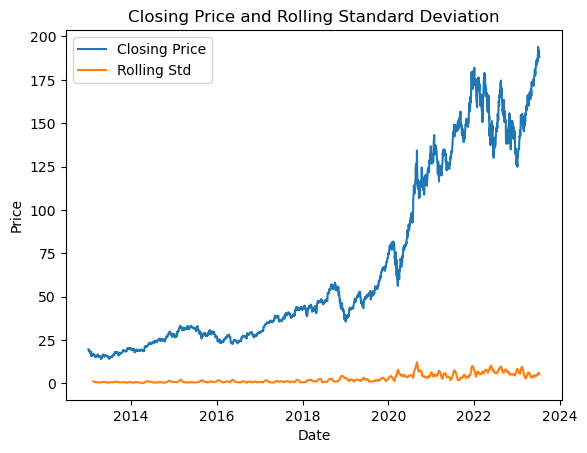

In [20]:
df['Rolling Std'] = df['Close'].rolling(window=30).std()
plt.plot(df.index, df['Close'], label='Closing Price')
plt.plot(df.index, df['Rolling Std'], label='Rolling Std')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Closing Price and Rolling Standard Deviation')
plt.legend(loc='best')
plt.show()

# Data Preprocessing

In [21]:
X = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
Y = df['Close']

In [22]:
features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [23]:
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[features]), columns=features)

In [24]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2, random_state=42)

In [25]:
X_train,Y_train =np.array(X_train),np.array(Y_train)
X_test,Y_test =np.array(X_test),np.array(Y_test)

In [26]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(2118, 6, 1)

In [27]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(530, 6, 1)

# LSTM Model Building

In [28]:
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(6, 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=64))
model.add(Dropout(0.2))

model.add(Dense(units=1))

In [29]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 6, 64)             16896     
                                                                 
 dropout (Dropout)           (None, 6, 64)             0         
                                                                 
 lstm_1 (LSTM)               (None, 6, 64)             33024     
                                                                 
 dropout_1 (Dropout)         (None, 6, 64)             0         
                                                                 
 lstm_2 (LSTM)               (None, 6, 64)             33024     
                                                                 
 dropout_2 (Dropout)         (None, 6, 64)             0         
                                                                 
 lstm_3 (LSTM)               (None, 6, 64)             3

# Model Training

In [31]:
model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
53/53 [==============================] - 19s 121ms/step - loss: 6370.8989 - val_loss: 5612.6816
Epoch 2/50
53/53 [==============================] - 2s 36ms/step - loss: 5483.4019 - val_loss: 5203.0713
Epoch 3/50
53/53 [==============================] - 2s 34ms/step - loss: 5118.7974 - val_loss: 4865.5596
Epoch 4/50
53/53 [==============================] - 1s 28ms/step - loss: 4807.1113 - val_loss: 4573.5688
Epoch 5/50
53/53 [==============================] - 1s 27ms/step - loss: 4522.0400 - val_loss: 4316.0352
Epoch 6/50
53/53 [==============================] - 1s 25ms/step - loss: 4293.8794 - val_loss: 4089.8169
Epoch 7/50
53/53 [==============================] - 1s 24ms/step - loss: 4086.6040 - val_loss: 3885.9380
Epoch 8/50
53/53 [==============================] - 1s 27ms/step - loss: 3886.9185 - val_loss: 3710.2427
Epoch 9/50
53/53 [==============================] - 2s 31ms/step - loss: 3727.2546 - val_loss: 3552.0327
Epoch 10/50
53/53 [==============================] - 

# Model Evaluation

In [32]:
predictions = model.predict(X_test)

17/17 [==============================] - 2s 7ms/step


In [33]:
loss = model.evaluate(X_test, Y_test)
print("Test Loss:", loss)

17/17 [==============================] - 0s 8ms/step - loss: 260.9104
Test Loss: 260.9103698730469


In [34]:
r2 = r2_score(Y_test, predictions)

In [35]:
mae = mean_absolute_error(Y_test, predictions)

In [36]:
mape = mean_absolute_percentage_error(Y_test, predictions)

In [37]:
rmse=np.sqrt(np.mean(((predictions- Y_test)**2)))

In [38]:
print("Coefficient of Determination (R^2):", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Root Mean Squared Error (RMSE):", rmse)

Coefficient of Determination (R^2): 0.9024900560293228
Mean Absolute Error (MAE): 8.007659796948703
Mean Absolute Percentage Error (MAPE): 0.08389655266321683
Root Mean Squared Error (RMSE): 66.5046912570499
